### Building CNN

In [2]:
# import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.optimizers import adam
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
from imutils import paths

In [3]:
# initialising the CNN
classifier=Sequential()

# Step 1-Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation="relu"))
# classifying image is non linear problem so if we use Relu then it replace the negative pixels with zeros and brings non linearity

# Step 2-Maxpooling
# Used to reduce the size of feature maps to improve computational performance
classifier.add(MaxPool2D(pool_size=(2,2)))

# Adding Second Convolution layer
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Adding Third Convolution layer
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Step 3-Flattening
# Used to convert all the feature maps into a huge single(1D) vector
classifier.add(Flatten())

# Step 4-Full Connection
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
# 128 is choosen as a common practise

<img src='cnn_arc.jpg'/>

In [16]:
# Compiling the CNN
INIT_LR=1e-2
NUM_EPOCHS=15
BS=32
# opt = adam(lr=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


In [17]:
# from keras.utils.vis_utils import plot_model 
# plot_model(classifier, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
# display(Image.open('cnn_model.png'))
# ! pip install pydot

### Fitting the CNN to the Images

In [18]:
from imutils import paths
root_dir = os.path.dirname('F:/DATASETS/')
train_dir = os.path.join(root_dir, 'CatDog/training/')
test_dir = os.path.join(root_dir, 'CatDog/testing/')
totalTrain = len(list(paths.list_images(train_dir)))
totalTest=len(list(paths.list_images(test_dir)))
print(totalTrain)
print(totalTest)
# train_dir='F:/DATASETS/CatDog/training/'
# test_dir='F:/DATASETS/CatDog/testing/'

2800
600


In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (100, 100),
                                                 batch_size = BS,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (100,100),
                                            batch_size = BS,
                                            class_mode = 'binary')


Found 2800 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [20]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = classifier.fit_generator(training_set,
                         steps_per_epoch = (totalTrain /BS),
                         epochs = NUM_EPOCHS,
                         validation_data = test_set,
                         validation_steps = totalTest/ BS,
                         callbacks = [checkpoint])
print(history.history.keys())

Epoch 1/15
88/87 [==============================] - 58s 654ms/step - loss: 0.6941 - accuracy: 0.5150 - val_loss: 0.7223 - val_accuracy: 0.5000
Epoch 2/15
 1/87 [..............................] - ETA: 12s - loss: 0.6877 - accuracy: 0.5312

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


88/87 [==============================] - 22s 250ms/step - loss: 0.6824 - accuracy: 0.5582 - val_loss: 0.8185 - val_accuracy: 0.5650
Epoch 3/15
88/87 [==============================] - 25s 283ms/step - loss: 0.6770 - accuracy: 0.5739 - val_loss: 0.6806 - val_accuracy: 0.6100
Epoch 4/15
88/87 [==============================] - 25s 283ms/step - loss: 0.6504 - accuracy: 0.6168 - val_loss: 0.6694 - val_accuracy: 0.5983
Epoch 5/15
88/87 [==============================] - 25s 281ms/step - loss: 0.6303 - accuracy: 0.6379 - val_loss: 0.6493 - val_accuracy: 0.6517
Epoch 6/15
88/87 [==============================] - 25s 283ms/step - loss: 0.6002 - accuracy: 0.6718 - val_loss: 0.7228 - val_accuracy: 0.6300
Epoch 7/15
88/87 [==============================] - 25s 284ms/step - loss: 0.5874 - accuracy: 0.6914 - val_loss: 0.5314 - val_accuracy: 0.6817
Epoch 8/15
88/87 [==============================] - 26s 296ms/step - loss: 0.5543 - accuracy: 0.7082 - val_loss: 0.6136 - val_accuracy: 0.6517
Epoch 9/15

### Saving Classifier:`

In [21]:
model_backup_path = os.path.join(root_dir, 'cat_or_dogs_model_new.h5')
classifier.save(model_backup_path)
print("[INFO]:Classifier saved to", model_backup_path)

[INFO]:Classifier saved to F:/DATASETS\cat_or_dogs_model_new.h5


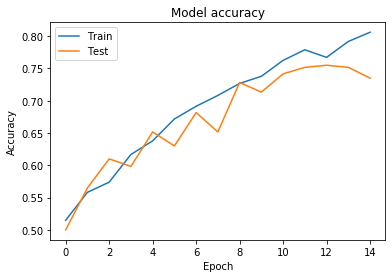

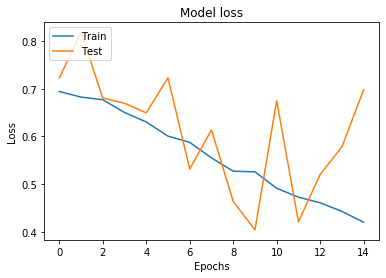

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Loading Classifier and Making New Prediction:

In [27]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('prediction/cat_dog_4.jpg', target_size = (100,100))
test_image = image.img_to_array(test_image)
print(test_image.shape)
# predict function expects input image to have 4 dimension but we have only 3 i.e.100X00X3
#predict function cant accept a single input by itself 
# it only accept image in a batch evenif the batch contains single image
# so we need to expand dimension from 3 to 4 of the image to predict
test_image = np.expand_dims(test_image, axis = 0)
print(test_image.shape)
# axis=0 means add new dimension in the first position
# the new dimension we have just created corrospends to batch
model = load_model(model_backup_path)#Loading classifier
result = model.predict(test_image)
print(result)
print(training_set.class_indices)

(100, 100, 3)
(1, 100, 100, 3)
[[0.]]
{'cats': 0, 'dogs': 1}


In [28]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print('[INFO]:The Prediction is a {}'.format(prediction))

[INFO]:The Prediction is a cat
